<a href="https://colab.research.google.com/github/Soumo31428/Simple-Linear-Regression/blob/main/Practical_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_excel('/content/height-weight.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

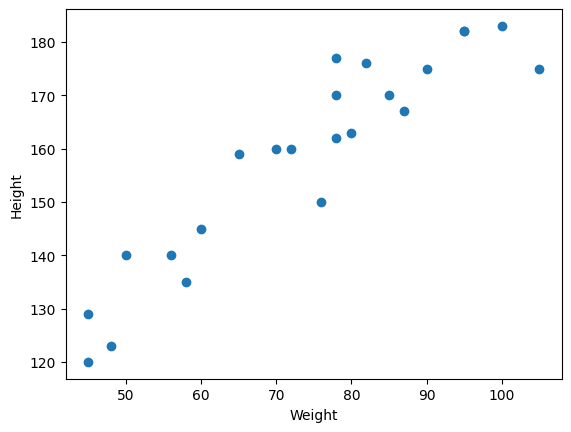

In [3]:
## Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


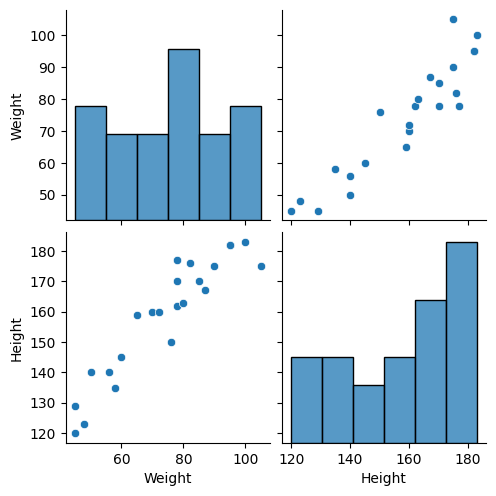

In [5]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [6]:
## Independent and dependent features
x = df[['Weight']]    # independent features should be data frame or 2 dimensions.
y = df['Height']      # this variable can be in series or 1D array.

In [7]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:

print(x_train.shape)
print(y_train.shape)

(18, 1)
(18,)


In [9]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print('Coefficient or slope is:',model.coef_)
print('Intercept:', model.intercept_)

Coefficient or slope is: [17.03440872]
Intercept: 157.5


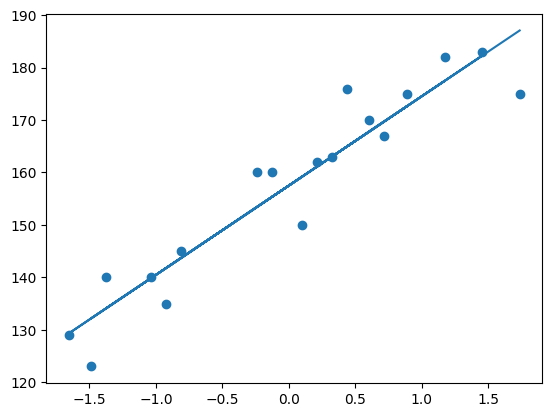

In [12]:
## Plot training data best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train))

In [13]:
## Prediction for test data
pred = model.predict(x_test)

In [14]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


**R square**

Formula:

**R^2 = 1- SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residulas SST = total sum of squares

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.776986986042344


**Adjusted R2 = 1-[(1-R2)*(n-1) / (n-k-1)]**


where :

R2: The R2 of the model n: The number of observations k: The number of predictor variables.

In [17]:
## display adjusted R-squared
1 - (1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [18]:
## OLS Linear Regression
import statsmodels.api as sm
model2 = sm.OLS(y_train, x_train).fit()

In [19]:
predict = model2.predict(x_test)
print(predict)

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [20]:
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 10 Feb 2025   Prob (F-statistic):                       0.661
Time:                        06:36:48   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
## Prediction for the new data
model.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])